In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.insert(0, '..')
from pathlib import Path
from fastcore.xtras import *

In [3]:
from framework.documents import * 
from framework.embeddings import *

[Apr 08, 23:13:45] Loading segmented_maxsim_cpp extension (set COLBERT_LOAD_TORCH_EXTENSION_VERBOSE=True for more info)...


/Users/cck/projects/cck-agents/.venv/lib/python3.12/site-packages/colbert/utils/amp.py:12: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
/Users/cck/projects/cck-agents/.venv/lib/python3.12/site-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


# Test the chunking and embedding of our PDF

In [38]:
data = Path('scratch')
fid = data / 'sample_doc-with-image-refs.md'
full_doc = fid.read_text()
len(full_doc)

68086

In [5]:
# convert the doc
orig_file = '../sample_doc.pdf'
res = convert(orig_file)

In [43]:
type(res.document)

docling_core.types.doc.document.DoclingDocument

In [45]:
from docling_core.types.doc.document import DoclingDocument

In [44]:
res.document.save_as_json("sample_doc.json")

In [47]:
document = DoclingDocument.load_from_json("sample_doc.json")

In [48]:
# chunk up the doc for ColBERT
texts, metas = chunk_docling_md(document)

In [49]:
len(texts),len(metas)

(95, 95)

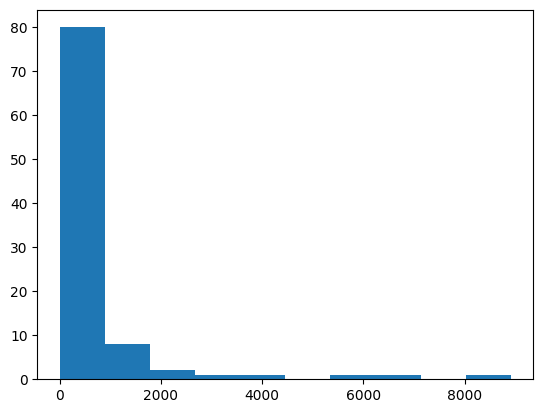

(741.0736842105263, 404.0, 8914, 7)

In [30]:
import matplotlib.pyplot as plt
import numpy as np
lens = [len(t) for t in texts]
plt.hist(lens)
plt.show()
np.mean(lens),np.median(lens),np.max(lens),np.min(lens)

# Embeddding the texts

In [ ]:
type(res)

In [40]:
# APARTE: manually passing in the full text, without chunking
RAG = colbert_embed(
    [full_doc],
    index_name="sample_doc_full",
)

New index_name received! Updating current index_name (sample_doc) to sample_doc_full
---- WARNING! You are using PLAID with an experimental replacement for FAISS for greater compatibility ----
This is a behaviour change from RAGatouille 0.8.0 onwards.
This works fine for most users and smallish datasets, but can be considerably slower than FAISS and could cause worse results in some situations.
If you're confident with FAISS working on your machine, pass use_faiss=True to revert to the FAISS-using behaviour.
--------------------


[Apr 08, 23:26:48] #> Creating directory .ragatouille/colbert/indexes/sample_doc_full 


[Apr 08, 23:26:49] [0] 		 #> Encoding 105 passages..


/Users/cck/projects/cck-agents/.venv/lib/python3.12/site-packages/colbert/utils/amp.py:12: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
/Users/cck/projects/cck-agents/.venv/lib/python3.12/site-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
  0%|          | 0/4 [00:00<?, ?it/s]/Users/cck/projects/cck-agents/.venv/lib/python3.12/site-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else NullContextManager()
/Users/cck/projects/cck-agents/.venv/lib/python3.12/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
100

[Apr 08, 23:26:51] [0] 		 avg_doclen_est = 152.56190490722656 	 len(local_sample) = 105


[Apr 08, 23:26:51] [0] 		 #> Saving the indexing plan to .ragatouille/colbert/indexes/sample_doc_full/plan.json ..
used 20 iterations (0.448s) to cluster 15219 items into 1024 clusters
[0.016, 0.016, 0.014, 0.016, 0.015, 0.015, 0.017, 0.016, 0.016, 0.015, 0.016, 0.017, 0.018, 0.015, 0.016, 0.019, 0.014, 0.017, 0.016, 0.016, 0.015, 0.016, 0.018, 0.015, 0.016, 0.016, 0.018, 0.017, 0.016, 0.017, 0.016, 0.014, 0.016, 0.016, 0.016, 0.017, 0.016, 0.016, 0.016, 0.019, 0.016, 0.017, 0.016, 0.017, 0.015, 0.016, 0.017, 0.018, 0.015, 0.016, 0.017, 0.016, 0.015, 0.016, 0.015, 0.016, 0.017, 0.016, 0.016, 0.017, 0.015, 0.017, 0.015, 0.015, 0.016, 0.017, 0.018, 0.015, 0.015, 0.017, 0.016, 0.016, 0.014, 0.017, 0.016, 0.016, 0.015, 0.016, 0.016, 0.017, 0.016, 0.015, 0.017, 0.016, 0.016, 0.016, 0.016, 0.017, 0.017, 0.017, 0.015, 0.018, 0.016, 0.018, 0.015, 0.015]


0it [00:00, ?it/s]

[Apr 08, 23:26:52] [0] 		 #> Encoding 105 passages..


100%|██████████| 4/4 [00:02<00:00,  1.67it/s]
1it [00:02,  2.44s/it]
100%|██████████| 1/1 [00:00<00:00, 1257.66it/s]

[Apr 08, 23:26:54] #> Optimizing IVF to store map from centroids to list of pids..
[Apr 08, 23:26:54] #> Building the emb2pid mapping..
[Apr 08, 23:26:54] len(emb2pid) = 16019



100%|██████████| 1024/1024 [00:00<00:00, 154450.78it/s]

[Apr 08, 23:26:54] #> Saved optimized IVF to .ragatouille/colbert/indexes/sample_doc_full/ivf.pid.pt
Done indexing!


In [31]:
# treating the hierarchical chunks as separate documents
# RAG = colbert_embed(
#     [texts],
#     metas,
# )

---- WARNING! You are using PLAID with an experimental replacement for FAISS for greater compatibility ----
This is a behaviour change from RAGatouille 0.8.0 onwards.
This works fine for most users and smallish datasets, but can be considerably slower than FAISS and could cause worse results in some situations.
If you're confident with FAISS working on your machine, pass use_faiss=True to revert to the FAISS-using behaviour.
--------------------


[Apr 08, 23:19:45] #> Note: Output directory .ragatouille/colbert/indexes/sample_doc already exists


[Apr 08, 23:19:45] #> Will delete 10 files already at .ragatouille/colbert/indexes/sample_doc in 20 seconds...
[Apr 08, 23:20:06] [0] 		 #> Encoding 172 passages..


/Users/cck/projects/cck-agents/.venv/lib/python3.12/site-packages/colbert/utils/amp.py:12: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
/Users/cck/projects/cck-agents/.venv/lib/python3.12/site-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
  0%|          | 0/6 [00:00<?, ?it/s]/Users/cck/projects/cck-agents/.venv/lib/python3.12/site-packages/colbert/utils/amp.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else NullContextManager()
/Users/cck/projects/cck-agents/.venv/lib/python3.12/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
100

[Apr 08, 23:20:10] [0] 		 avg_doclen_est = 103.0 	 len(local_sample) = 172
[Apr 08, 23:20:10] [0] 		 #> Saving the indexing plan to .ragatouille/colbert/indexes/sample_doc/plan.json ..


used 16 iterations (1.3025s) to cluster 16831 items into 2048 clusters
[0.014, 0.015, 0.012, 0.013, 0.013, 0.013, 0.014, 0.015, 0.014, 0.013, 0.015, 0.015, 0.015, 0.013, 0.014, 0.015, 0.012, 0.015, 0.014, 0.013, 0.013, 0.014, 0.015, 0.013, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.013, 0.013, 0.015, 0.013, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.013, 0.015, 0.015, 0.014, 0.013, 0.014, 0.015, 0.015, 0.015, 0.015, 0.015, 0.014, 0.014, 0.013, 0.014, 0.013, 0.014, 0.014, 0.014, 0.015, 0.014, 0.014, 0.014, 0.012, 0.015, 0.015, 0.015, 0.013, 0.013, 0.014, 0.013, 0.014, 0.013, 0.015, 0.014, 0.015, 0.014, 0.013, 0.014, 0.014, 0.014, 0.014, 0.013, 0.014, 0.014, 0.014, 0.013, 0.015, 0.014, 0.014, 0.014, 0.016, 0.013, 0.015, 0.014, 0.013]


0it [00:00, ?it/s]

[Apr 08, 23:20:11] [0] 		 #> Encoding 172 passages..


100%|██████████| 6/6 [00:03<00:00,  1.60it/s]
1it [00:03,  3.82s/it]
100%|██████████| 1/1 [00:00<00:00, 1133.90it/s]

[Apr 08, 23:20:15] #> Optimizing IVF to store map from centroids to list of pids..
[Apr 08, 23:20:15] #> Building the emb2pid mapping..
[Apr 08, 23:20:15] len(emb2pid) = 17716



100%|██████████| 2048/2048 [00:00<00:00, 149762.62it/s]

[Apr 08, 23:20:15] #> Saved optimized IVF to .ragatouille/colbert/indexes/sample_doc/ivf.pid.pt
Done indexing!


In [41]:
%%capture
results = RAG.search(
    "COVID severity from DNA damage markers in men compared to women",
    k=3,
)

In [37]:
for r in results:
    print(r['content'])

The obtained data highlight the potential significance of DNA damage as a biomarker in predicting the severity of COVID-19. Our analysis revealed that patients with severe COVID-19 exhibited higher levels of DNA damage compared to those with moderate disease, with male patients showing more pronounced damage than females. predictors of severity included age, CRP , creatinine, and INR, all correlating positively with DNA damage. ROC analysis further validated and identified specific cut-off values for the age (72.5 years)  INR (1.46 s), creatinine (78.0 umol/L) DNA damage (9.72%), and CRP (50.0 mg/L) as significant predictors of severe COVID-19 , highlighting their clinical relevance_ The cut-off points of the indicators studied are not valid in all subgroups strati fied by sex and age, and there are also minor differences in level between them, which is consistent with the importance of sex and age in the severity of infection and should be taken into account:. Thus, in the studied gro

In [42]:
for r in results:
    print(r['content'])

Our analysis revealed that patients with severe COVID-19 exhibited higher levels of DNA damage compared to those with moderate disease, with male patients showing more pronounced damage than females. predictors of severity included age, CRP , creatinine, and INR, all correlating positively with DNA damage. ROC analysis further validated and identified specific cut-off values for the age (72.5 years)  INR (1.46 s), creatinine (78.0 umol/L) DNA damage (9.72%), and CRP (50.0 mg/L) as significant predictors of severe COVID-19 , highlighting their clinical relevance\_ The cut-off points of the indicators studied are not valid in all subgroups strati fied by sex and age, and there are also minor differences in level between them, which is consistent with the importance of sex and age in the severity of infection and should be taken into account:. Thus, in the studied group of patients, the levels of DNA damage are well consistent with the severity of COVID-19.
Current studies of predictive b